## Predicting heart disease using machine learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.





## 1.Problem Definition
In a statement,
> Given clinical parameters about a patient,can we predict whether or not they have heart disease ?

## 2.Data
The original data came from the Cleveland data from the UCI Machine learning repository.
https://archive.ics.uci.edu/ml/datasets/Heart+Disease
There is also a version of it availabel on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3.Evaluation

>If we can reach 95% accuracy at prediciting whether or not a patient has heart disease during the proof of concept,we'll pursue the project.

## 4.Features

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

## Preparing the tools 


In [1]:
## Import all the tools we need


## Regular EDA(Exploratory data analysis) and plotting libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# We want our plots to appear inside the notebook
%matplotlib inline 


## Model from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score,f1_score,recall_score
from sklearn.metrics import plot_roc_curve

## Load data

In [2]:
df=pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape #(rows,columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)



In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
## Let's find out  how many of each class there
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

**This shows the data is balanced because of having almost equal no of data for both classes**

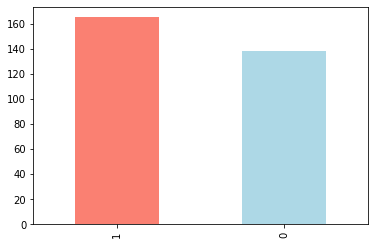

In [6]:
##Visualize this
df.target.value_counts().plot(kind="bar",color=["salmon","lightblue"]);

plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to Sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target column to the sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


* It shows out of all women there is 75% chance  of suffering from heart disease and 50% chance for men of suffering from heart disease *

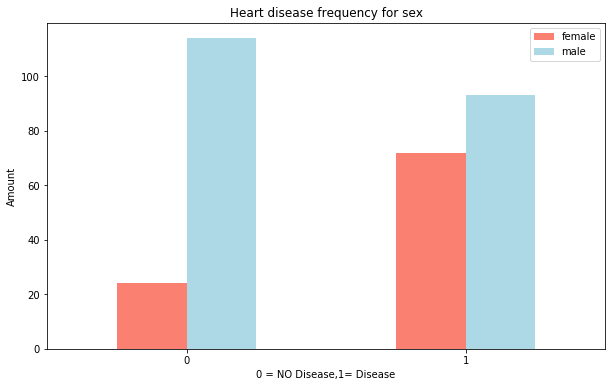

In [12]:
# create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"]);

plt.title("Heart disease frequency for sex")
plt.xlabel("0 = NO Disease,1= Disease")
plt.ylabel("Amount")
## Change the legend name
plt.legend(["female","male"]);

##Rotate the number on the x-axis 
plt.xticks(rotation=0);

## Finding patterns 2

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

## Age vs maximum heart rate(thalach)

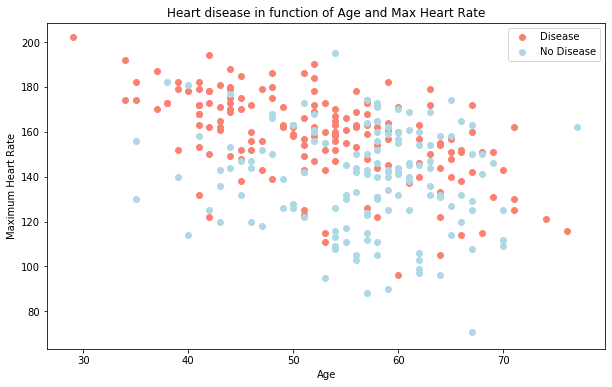

In [6]:
## Create another figure 
plt.figure(figsize=(10,6))

##Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")
##Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

## Add some helpfu; info
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.legend(["Disease","No Disease"]);

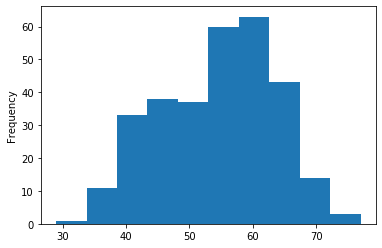

In [7]:
## Check the distribution of the age column with the histogram
### This tells which is the outlier
df["age"].plot.hist();

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Heart disease Frequency per chest pain type


In [18]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


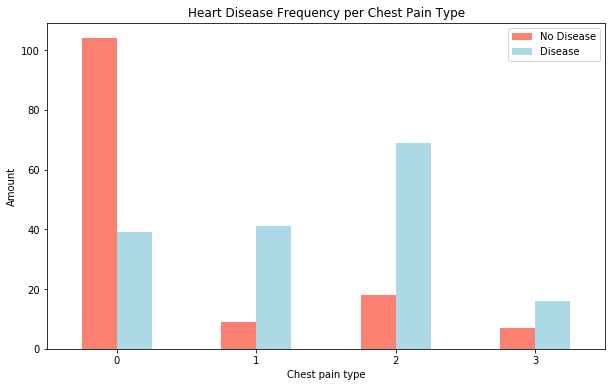

In [19]:
## Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                  color=["salmon","lightblue"])

## Add some communication
plt.title("Heart Disease Frequency per Chest Pain Type");
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);


In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Finding patterns 3

# Correlational analysis

### Make correlational matrix

In [21]:
# Make a correlational matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


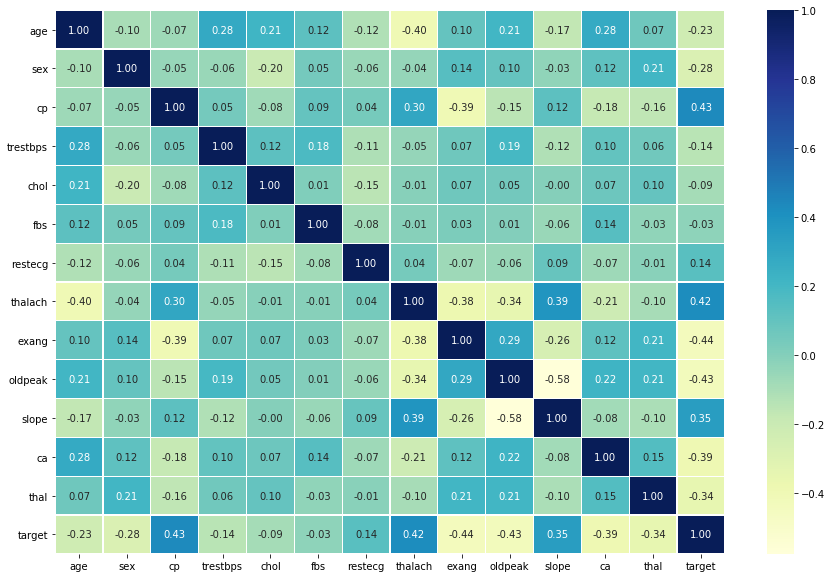

In [22]:
##Let's make our correlation matriz a little more visual using seaborn
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.2,
              fmt=".2f",#format numbers upto 2 decimal point
              cmap="YlGnBu");

# 5.Modelling

In [23]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [24]:
##Split the data into X and y
X=df.drop("target",axis=1)
y=df.target



In [25]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [26]:
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [27]:
#Split the data into train and test sets
np.random.seed(42)

##Split the data into train and split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [28]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [29]:
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

* Now we've got our data split into training and test sets,it's time to build machine learning model
* We'll train it (find the patterns) on the training set.
* And we'll test it(use the patterns) on the test set.

In [30]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [31]:
models={"RandomForestClassifier":RandomForestClassifier(),
       "KNeighborsClassifier":KNeighborsClassifier(),
       "LogisticRegression":LogisticRegression(),
       #"LinearSVC":LinearSVC,
       #"SVC":SVC
       }
results={}

In [32]:
def evaluate(X_train,y_train,X_test,y_test):
    """
        Fits the data and evaluate
    """
    for model_name,model in models.items():
       #Set random seed
        np.random.seed(42)
        print(f"Training on {model_name}")
        #Fit the model
        model.fit(X_train,y_train)
        
        print(f"Scoring on {model_name}")
        #Evaluate the model and append its score to results
        score=model.score(X_test,y_test)
        
        results[model_name]=score
        
        

In [33]:
evaluate(X_train,y_train,X_test,y_test)

Training on RandomForestClassifier
Scoring on RandomForestClassifier
Training on KNeighborsClassifier
Scoring on KNeighborsClassifier
Training on LogisticRegression
Scoring on LogisticRegression


C:\Users\DELL\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
results

{'RandomForestClassifier': 0.8360655737704918,
 'KNeighborsClassifier': 0.6885245901639344,
 'LogisticRegression': 0.8852459016393442}

In [35]:
## Model comparison
model_compare=pd.DataFrame(results,index=["Accuracy"])
model_compare

,RandomForestClassifier,KNeighborsClassifier,LogisticRegression
Accuracy,0.836066,0.688525,0.885246


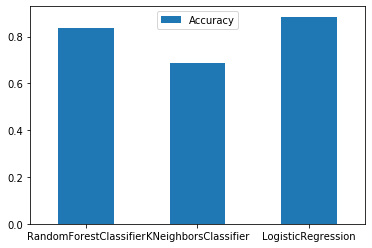

In [36]:
model_compare.T.plot(kind="bar");
plt.xticks(rotation=0);

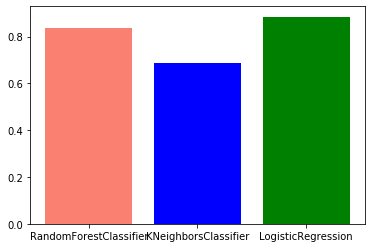

In [37]:

fig,ax=plt.subplots()
ax.bar(results.keys(),
      results.values(),
      color=["salmon","blue","green"],
      );



# TUNING HYPERPARAMETERS

### Let's look at the following :
* Hyperparameter tuning 
* Feature importance 
* Confusion matrix
* Cross validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve 
* Area under curve (AUC)

#### Hyperparameter tuning 
##### Let's turn KNN

In [38]:
#Let's tune KNN
train_scores=[]
test_scores=[]

##Create a list of different values for n_neighbors
neighbors=range(1,21)

#setup KNN instance
knn=KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(X_train,y_train)
    
    #Update training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    ##Update the test score list
    test_scores.append(knn.score(X_test,y_test))

In [39]:
train_scores[:2],np.array(test_scores).argmax()

([1.0, 0.8099173553719008], 10)

In [40]:
test_scores[10]

0.7540983606557377

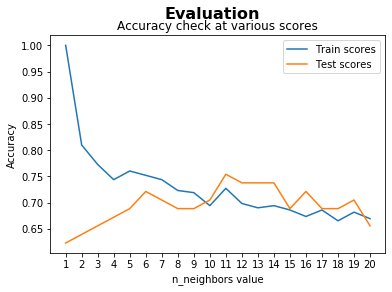

In [42]:
##Visualize
plt.plot(neighbors,train_scores,label="Train scores")
plt.plot(neighbors,test_scores,label="Test scores")
plt.legend();
plt.xlabel("n_neighbors value")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1,21,1))
plt.title("Accuracy check at various scores");
plt.suptitle("Evaluation",fontweight="bold",fontsize=16);


###### Use RandomSearch and GridSearch for hyperparameter tuning

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestRegression()

.....using RandomizedSearchCV

* Note:Use continuous range of values for hyperparameter tuning using RandomizedSearchCV

In [43]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}

# Create hbyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}



Let's tune using RandomizedSearchCV

In [44]:
#Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisiticRegression
rs_log_reg=RandomizedSearchCV(estimator=LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

##Fit randomhyperparameter search model for LogisticRegression 
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [45]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [46]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

# RandomForestClassifier

In [47]:
np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)
rs_rf.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [48]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [49]:
rs_rf.score(X_test,y_test)

0.8688524590163934

## Go through process of elimination to eliminate models that doesn't improve

## Hyperparameter Tuning with GridSearchCV
Since our LogisiticRegression model provides the best scores so far,we'll try and improve them again using GridSearchCV

In [50]:
## Different hyperparameters for our LogisitcRegression model
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}
                       
##Setup grid hyperparameter for GridSearchCV
gs_log_reg=GridSearchCV(estimator=LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)

## Fit grid hyperparameters search model
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished


**NOTE:LogisticRegression is fast so,fitting is also fast.**

In [52]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [54]:
#Evaluate the logisitc regression
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [55]:
results

{'RandomForestClassifier': 0.8360655737704918,
 'KNeighborsClassifier': 0.6885245901639344,
 'LogisticRegression': 0.8852459016393442}

# EVALUATING OUR MODEL

#### Evaluate our tuned machine learning classifier,beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1

....and it would be great if cross validation was used where possible.

To make comparisons and evaluate our trained model ,first we need to make predictions
**Its always comparing our predictions to the truth value**

In [93]:
#Make predictions with tuned model
y_preds=gs_log_reg.predict(X_test)


In [94]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [95]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

Text(0.5, 1.0, 'Great')

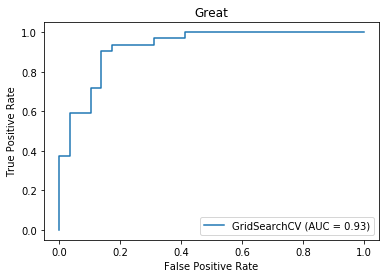

In [105]:
## Plot using built in function
plot_roc_curve(gs_log_reg,X_test,y_test)


In [99]:
y_preds_proba=gs_log_reg.predict_proba(X_test)

In [102]:
y_preds_proba=y_preds_proba[:,1]

In [103]:
# Plot ROC_CURVE
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_preds_proba)

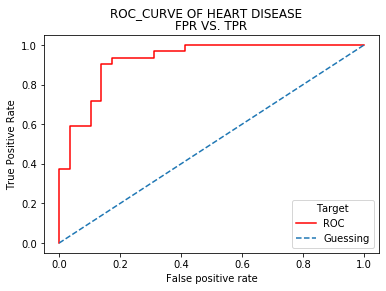

In [104]:
def plot_curve(fpr,tpr):
    """
    Plot a roc curve
    """
    plt.plot(fpr,tpr,color="red",label="ROC")
    plt.xlabel("False positive rate")
    plt.ylabel("True Positive Rate")
    plt.title("FPR VS. TPR")
    plt.suptitle("ROC_CURVE OF HEART DISEASE")
    
    plt.plot([1,0],[1,0],linestyle="--",label="Guessing")
    plt.legend(title="Target")
plot_curve(fpr,tpr)

In [108]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


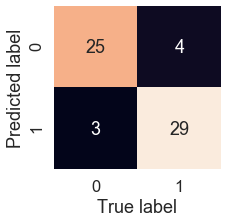

In [115]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using seabonr heat map
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,#Displays number in front of map
                   cbar=False#deletes the bar on the side
                   
                  )
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
plot_conf_mat(y_test,y_preds)

NOw we've got a ROC curve ,an AUC metric and a confusion matrix.Let's get a classification report as well as cross-validated precision,recall and f1 score.

In [117]:
## Classification report 
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### This is not a cross validated instead it is done only on one set of data.

### Calculate evaluation metrics using  Cross Validation
We're going to calculate precision,recall and f1-score using cross_cal_score

In [123]:
## Check the best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [125]:
## Create a new classifier with best parameters we found
clf=LogisticRegression(C= 0.20433597178569418, 
                       solver= 'liblinear')


In [126]:
from sklearn.model_selection import cross_val_score

In [154]:
## Cross validated accuracy
np.random.seed(42)
cv_accuracy=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_accuracy=cv_accuracy.mean()

In [155]:
## cross validated recall
np.random.seed(42)
cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall=cv_recall.mean()

In [156]:
## cross validated precision
np.random.seed(42)
cv_precision=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision=cv_precision.mean()

In [157]:
## f1 score
np.random.seed(42)
cv_f1=cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1=cv_f1.mean()

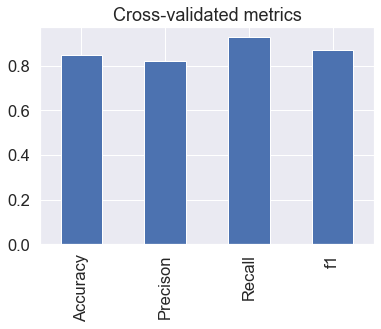

In [173]:
## visulize our cross validated metrics
cv_metrics=pd.DataFrame({"Accuracy":cv_accuracy,
                        "Precison":cv_precision,
                        "Recall":cv_recall,
                        "f1":cv_f1},
                    index=[0])

cv_metrics.T.plot(kind="bar",
                 legend=False,
                 title="Cross-validated metrics"
               );


# Feature importance
* It is another way of asking ,"which features contributes most to the outcomes of the model and how did they contribute?"
### Find the most important features

* Finding  feature importance is different for each machine learning model.One way to find the feature importance is to search for "(Model name) feature importance"

Let's find the feature importance for our LogisitcRegression model..

In [178]:
## Fit an  instant of LogisiticRegression
gs_log_reg.best_params_
clf=LogisticRegression(C= 0.20433597178569418,
                       solver="liblinear")
clf.fit(X_train,y_train);

In [180]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Coef_ checks how features and target(label) are correlated to each other

In [182]:
# Check coef_
a=clf.coef_
a.size

13

In [201]:
dict(zip(df.columns,(clf.coef_[0])))

{'age': 0.003167278990517721,
 'sex': -0.8604463644626569,
 'cp': 0.6606705054012705,
 'trestbps': -0.011569931335912368,
 'chol': -0.0016637438070300692,
 'fbs': 0.04386116284216185,
 'restecg': 0.31275829369964075,
 'thalach': 0.02459361297137234,
 'exang': -0.6041307139378419,
 'oldpeak': -0.5686281825180214,
 'slope': 0.450516263738603,
 'ca': -0.6360988840661891,
 'thal': -0.6766338062111971}

In [185]:
# Match coef's of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.003167278990517721,
 'sex': -0.8604463644626569,
 'cp': 0.6606705054012705,
 'trestbps': -0.011569931335912368,
 'chol': -0.0016637438070300692,
 'fbs': 0.04386116284216185,
 'restecg': 0.31275829369964075,
 'thalach': 0.02459361297137234,
 'exang': -0.6041307139378419,
 'oldpeak': -0.5686281825180214,
 'slope': 0.450516263738603,
 'ca': -0.6360988840661891,
 'thal': -0.6766338062111971}

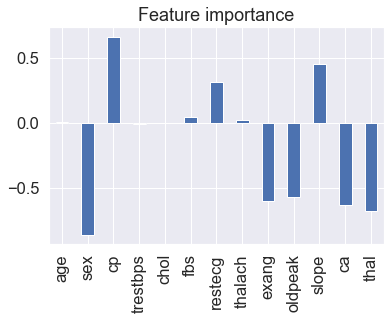

In [211]:
## Visualize feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature importance",legend=False);

**It's telling us how the data contributes or correlates to the target.
* Positive coeffiecient=Above 0 is positive related as slope increase, value increase.
* Negative coeffiecient= below 0 is neagtive correlation.**

In [213]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


**1. Look for ratio increase and decrease.eg.as So as sex goes up the target value the ratio decreases so you can see here if the sex is zero for female
there's almost a three to one ratio here
So(72/24) seventy two divided by 24 is almost three.
Look at that.
Seventy two divided by right.
Twenty four so it's a three to one ratio here.
And then as sex increases the target goes down to about a one to 2 ratio C there's roughly a 50/50 here(93/114) is a negative correlation.**

In [214]:
pd.crosstab(df.slope,df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
